<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

<!--NAVIGATION-->
< [Measure of Statistical Dependence](05.06-Measure-of-Statistical-Dependence.ipynb) | [Contents](Index.ipynb) | [Polynomial Regression](05.08-Polynomial-Regression.ipynb) >

## 5.7 线性回归

线性回归是一种用线性函数来模拟两个变量之间关系的方法。我们将使用`st.linregress`函数进行线性回归。我们首先使用已知的线性模型生成一些虚拟数据，并使用正态分布随机变量添加一些噪音。除了模型系数之外，`linregress`还提供相关性、p值和标准误差的估计。

In [1]:
import numpy as np
import scipy.stats as st
# 生成数据
n = 100 #数据长度
x = np.random.rand(n)
y = 3 + 7*x + np.random.randn(n)
# 执行线性回归
b,a,r,p,e = st.linregress(x,y)
print(a,b)

2.84221079098 7.09731123177


我们使用线性模型($y=3+7x+\epsilon$)生成数据,而线性回归为($y=2.84+7.10x$)。拟合模型和真实模型的差异是因为噪音。当你增加更多的噪音时，你会看到拟合模型更加偏离现实。图5.13显示了真实线($y=3+7x$),损坏测量($y=3+7x+\epsilon$),拟合线($y=2.84+7.1x$),和拟合线的预测区间。拟合线和真实线匹配合理。预测区间也相当合理。

预测的$Y_pred$的方差由下式给出:

<center>$\sigma^2 = E[(Y_pred-\widehat{Y})^2] = \sigma_{\epsilon}^2(1+\frac{1}{n}+\frac{(X_0-\overline{X})^2}{\sum_{i=1}^{n}(X - \overline{X})^2})\qquad$(5.1)<center>
    
其中，$\sigma_{\epsilon}^2$是由剩余方差的经典无偏估计的$s^2$估计的。$\sigma_{pred}^2$是使用t分布与n-2自由度产生的预测区间(因为$s^2$是一个估计量)。在$Y_pred$置信区间由下式给出,

<center>$PI = \sigma_{pred}*z\qquad$(5.2)</center>

其中，$PI$是预测间距，$z$是t分布在$\alpha$显著水平上的值。

In [2]:
eps = y - a - b*x # 拟合数据和测量数据的误差
x1 = np.linspace(0, 1) # x轴绘制PI
# 拟合误差的方差
e_pi = np.var(eps)*(1+1.0/n + (x1-x.mean())**2/np.sum((x-x.mean())**2))
# z值使用t分布和dof = n-2
z = st.t.ppf(0.95, n-2)
# 预测间距
pi = np.sqrt(e_pi)*z
zl = st.t.ppf(0.10, n-2) # z在0.1
zu = st.t.ppf(0.90, n-2) # z在0.9
ll = a + b*x1 + np.sqrt(e_pi)*zl # 10 %
ul = a + b*x1 + np.sqrt(e_pi)*zu # 90 %

最终，我们可以绘制出真实线、拟合线、带噪音的损坏测量和预测区间。

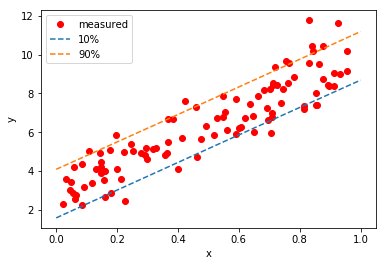

In [4]:
import matplotlib.pyplot as plt
plt.plot(x,y,'ro', label='measured')
plt.plot(x1,ll,'--', label='10%')
plt.plot(x1,ul,'--', label='90%')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()